In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

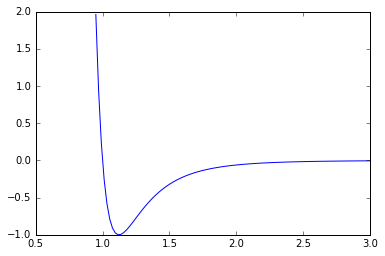

In [2]:
def lj_potential(r, sigma=1.0, epsilon=1.0):
    q = (sigma / r)**6
    return 4.0 * (epsilon * (q * (q - 1.0)))

r = np.linspace(0.95, 3.0, 100)
plt.plot(r, lj_potential(r))

In [3]:
def interaction_potential(xyz, sigma=1.0, epsilon=1.0):
    r = np.linalg.norm(xyz[1, :] - xyz[0, :])
    return lj_potential(r, sigma=sigma, epsilon=epsilon)

In [4]:
def external_potential(xyz, box_length=None):
    if box_length is None:
        return 0.0
    if np.all(xyz >= 0.0) and np.all(xyz <= box_length):
        return 0.0
    return np.inf

In [5]:
def phi(xyz, sigma=1.0, epsilon=1.0, box_length=None):
    return interaction_potential(xyz, sigma=sigma, epsilon=epsilon) + external_potential(xyz, box_length=box_length)

In [6]:
def metropolis_update(xyz, pot, sigma=1.0, epsilon=1.0, box_length=None, step=0.1, beta=1.0):
    xyz_trial = xyz + 2.0 * step * (np.random.rand(*xyz.shape) - 0.5)
    pot_trial = phi(xyz_trial, sigma=sigma, epsilon=epsilon, box_length=box_length)
    if pot_trial <= pot or np.random.rand() < np.exp(beta * (pot - pot_trial)):
        return xyz_trial, pot_trial
    return xyz, pot

In [7]:
def metropolis(xyz_init, size, sigma=1.0, epsilon=1.0, box_length=None, step=0.1, beta=1.0):
    xyz_traj = [np.asarray(xyz_init, dtype=np.float64)]
    pot_traj = [phi(xyz_traj[-1], sigma=sigma, epsilon=epsilon, box_length=box_length)]
    for i in range(size):
        xyz, pot = metropolis_update(
            xyz_traj[-1], pot_traj[-1],
            sigma=sigma, epsilon=epsilon, box_length=box_length,
            step=step, beta=beta)
        xyz_traj.append(xyz)
        pot_traj.append(pot)
    return np.asarray(xyz_traj, dtype=np.float64), np.asarray(pot_traj, dtype=np.float64)

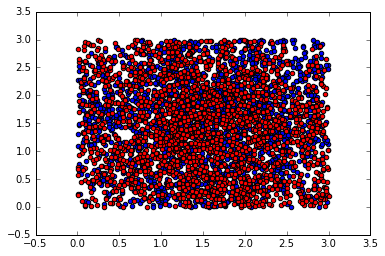

In [8]:
xy, pot = metropolis([[0.1, 0.1], [0.9, 0.9]], 100000, epsilon=1.0, box_length=3.0, beta=10.0)
plt.scatter(xy[::50, 0, 0], xy[::50, 0, 1], c="blue")
plt.scatter(xy[::50, 1, 0], xy[::50, 1, 1], c="red")

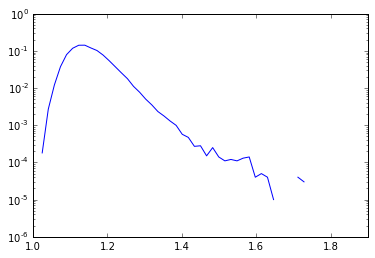

In [9]:
hist, edges = np.histogram(np.linalg.norm(xy[:, 1, :] - xy[:, 0, :], axis=-1), bins=50)
rho = hist.astype(np.float64) / np.sum(hist)

plt.plot(edges[1:], rho)
plt.semilogy();